<a href="https://colab.research.google.com/github/NajwaMoursli/ML/blob/main/Projet_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1-Convertir fichier h5 en csv

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [1]:
from google.colab import files
uploaded = files.upload()

Saving SG24_dataset.h5 to SG24_dataset.h5


In [188]:
import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mp
from matplotlib import cm
import collections




from sklearn.decomposition import PCA
import seaborn as sn
import random
import statistics

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.dummy import DummyClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

# Charger et identifier les données

In [19]:
filename = 'SG24_dataset.h5'
f = h5py.File(filename, 'r')

# List all groups
print("Keys: %s" % f.keys())
a_group_key = list(f.keys())[0]

# Get the data
data = list(f[a_group_key])
pd.DataFrame(data).to_csv("SG24_dataset.csv")


Keys: <KeysViewHDF5 ['Predictors', 'Target', 'User']>


In [3]:
sg=pd.read_csv("SG24_dataset.csv",delimiter=",")
print(sg)

    Unnamed: 0           0           1  ...        2397        2398        2399
0            0    0.000000    0.000000  ...   79.688438   79.544701   81.159004
1            1    0.000000    0.000000  ...  -11.858158  -12.103958   -7.099304
2            2    0.000000    0.000000  ...   29.157537   31.077909   26.780325
3            3    0.145442    0.195537  ...    0.675974    0.598320    0.667890
4            4    0.000000    0.000000  ...    0.008543   -0.014845    0.286645
5            5   -0.989367   -0.980696  ...    0.631599    0.685385    0.537282
6            6    0.000000    0.000000  ...   -0.379564   -0.414777   -0.427885
7            7   77.000000   20.000000  ...  130.000000  122.000000  130.000000
8            8   67.000000  131.000000  ...  142.000000  124.000000  138.000000
9            9   74.000000  127.000000  ...  155.000000  115.000000  148.000000
10          10   94.000000  144.000000  ...  123.000000  119.000000   72.000000
11          11  165.000000   63.000000  

In [209]:
X=np.array(f['Predictors']).T
Y=np.array(f['Target']).T.reshape(-1)
U=np.array(f['User']).T.reshape(-1)


print(U.shape)
print(T.shape)
print(X.shape)

(2400,)
(2400,)
(2400, 29)


# Première Partie: Description et analyse de données



In [205]:
#première analyse des données
	
col = []
nombre_lignes,colonne = sg.shape #donne le nombre de lignes et de colonnes 

#affiche les premières lignes d'un jeu de données 
print("Premières lignes du jeu de données : ")
print(sg.head())
		
print("Description des données :")
print(sg.describe(include="all"))

print("Enumération des colonnes : ")
print(sg.columns)



Premières lignes du jeu de données : 
   Unnamed: 0         0         1  ...       2397       2398       2399
0           0  0.000000  0.000000  ...  79.688438  79.544701  81.159004
1           1  0.000000  0.000000  ... -11.858158 -12.103958  -7.099304
2           2  0.000000  0.000000  ...  29.157537  31.077909  26.780325
3           3  0.145442  0.195537  ...   0.675974   0.598320   0.667890
4           4  0.000000  0.000000  ...   0.008543  -0.014845   0.286645

[5 rows x 2401 columns]
Description des données :
       Unnamed: 0           0           1  ...        2397        2398        2399
count   29.000000   29.000000   29.000000  ...   29.000000   29.000000   29.000000
mean    14.000000   70.660554   66.455684  ...   76.273254   85.116301   95.065654
std      8.514693   52.439249   47.320571  ...   53.510131   60.524772   60.257037
min      0.000000   -0.989367   -0.980696  ...  -11.858158  -12.103958   -7.099304
25%      7.000000    0.145442   20.000000  ...   44.000000   31.

#Visualisation dataset

In [122]:
df = pd.DataFrame(X)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28
0,0.0,0.0,0.0,0.145442,0.0,-0.989367,0.0,77.0,67.0,74.0,94.0,165.0,82.0,68.0,79.0,138.0,72.0,97.0,106.0,132.0,77.0,91.0,96.0,0.0,83.0,33.0,136.0,140.0,143.0
1,0.0,0.0,0.0,0.195537,0.0,-0.980696,0.0,20.0,131.0,127.0,144.0,63.0,56.0,83.0,48.0,53.0,101.0,128.0,70.0,58.0,93.0,119.0,64.0,82.0,105.0,119.0,79.0,103.0,82.0
2,0.0,0.0,0.0,0.294340,0.0,-0.955701,0.0,22.0,139.0,134.0,125.0,76.0,68.0,81.0,56.0,61.0,96.0,141.0,75.0,59.0,87.0,130.0,68.0,86.0,106.0,131.0,75.0,105.0,89.0
3,0.0,0.0,0.0,0.352911,0.0,-0.935657,0.0,7.0,135.0,137.0,158.0,70.0,68.0,82.0,61.0,57.0,97.0,161.0,79.0,59.0,85.0,137.0,69.0,87.0,106.0,132.0,76.0,114.0,75.0
4,0.0,0.0,0.0,0.318924,0.0,-0.947780,0.0,123.0,164.0,69.0,56.0,82.0,52.0,57.0,96.0,124.0,70.0,60.0,83.0,124.0,64.0,80.0,105.0,120.0,67.0,115.0,80.0,0.0,83.0


#Description données

In [67]:
# Colorize the graph based on likeability:
likeability_scores = np.array(T)
 
data_normalizer = mp.colors.Normalize()
color_map = mp.colors.LinearSegmentedColormap(
    "my_map",
    {
        "red": [(0, 1.0, 1.0),
                (1.0, .5, .5)],
        "green": [(0, 0.5, 0.5),
                  (1.0, 0, 0)],
        "blue": [(0, 0.50, 0.5),
                 (1.0, 0, 0)]
    }
)

# Répartition du nb de répétitions du geste en fonction du geste considéré

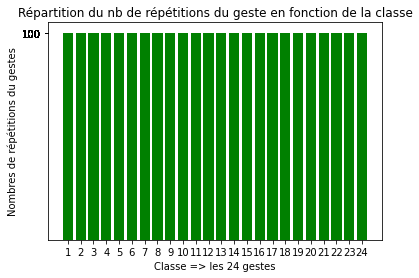

In [91]:
targets,counts=np.unique(Y,return_counts=True)
plt.bar(targets,counts,color=['green'])
plt.xlabel('Classe => les 24 gestes')
plt.xticks(targets)
plt.yticks(counts)
plt.ylabel('Nombres de répétitions du gestes')
plt.title("Répartition du nb de répétitions du geste en fonction de la classe")
plt.show()

# Répartition du nb de répétitions du geste en fonction de l'utilisateur considéré

Text(0, 0.5, 'Nombres de répétitions de gestes')

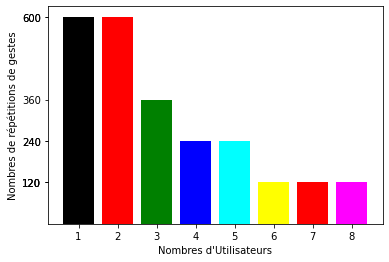

In [92]:
user, counts = np.unique(U, return_counts=True)
plt.bar(user, counts,color=['black', 'red', 'green', 'blue', 'cyan','yellow','red','magenta'])
plt.xticks(user)
plt.yticks(counts)
plt.xlabel("Nombres d'Utilisateurs")
plt.ylabel("Nombres de répétitions de gestes")


On observe que le nombre de classe est équilibré concernant les gestes mais pas pour les utilisateurs qui sont un peu plus dispersés avec plus de gestes réalisés par les utilisateurs 1 et 2 que 6, 7 ou 8.

On nous précise dans l'énoncé qu'il y a plusieurs utilisateurs, avec plusieurs mesures ce qui peut poser problème par la suite. On souhaiterait observer les mesures relevées par nos capteurs pour un même geste par un même utilisateur et également par plusieurs utilisateurs différents dans le but de relever une tendance ou des régularités.

In [210]:
#Utilisateur 1 geste 2,9,18
t2_u1 = np.where((T == 2) & (U == 1))[0]
t9_u1= np.where((T == 9) & (U == 1))[0]
t18_u1= np.where((T == 18) & (U == 1))[0]

#Utilisateur 4 geste 2,9,18
t2_u4 = np.where((T == 2) & (U == 4))[0]
t9_u4= np.where((T == 9) & (U == 4))[0]
t18_u4= np.where((T == 18) & (U == 4))[0]

#Utilisateur 8 geste 2,9,18
t2_u8 = np.where((T == 2) & (U == 8))[0]
t9_u8= np.where((T == 9) & (U == 8))[0]
t18_u8= np.where((T == 18) & (U == 8))[0]



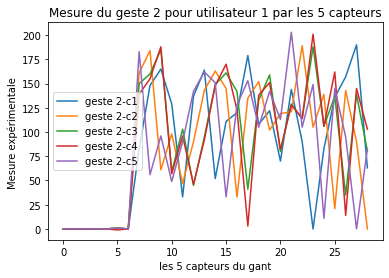

In [211]:
for i in range(5):
    plt.plot(X[t2_u1[i]], label="geste 2-c"+str(i+1))
    plt.legend()

plt.xlabel("les 5 capteurs du gant")
plt.ylabel("Mesure expérimentale ")
plt.title('Mesure du geste 2 pour utilisateur 1 par les 5 capteurs')
plt.show()

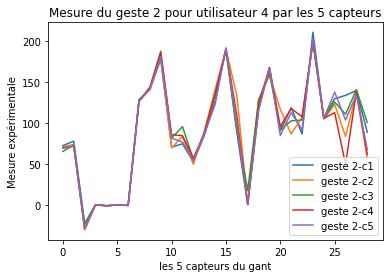

In [129]:
for i in range(5):
    plt.plot(X[t2_u4[i]], label="geste 2-c"+str(i+1))
    plt.legend()

plt.xlabel("les 5 capteurs du gant")
plt.ylabel("Mesure expérimentale")
plt.title('Mesure du geste 2 pour utilisateur 4 par les 5 capteurs')
plt.show()

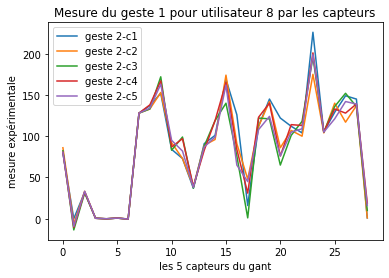

In [130]:
for i in range(5):
    plt.plot(X[t2_u8[i]], label="geste 2-c"+str(i+1))
    plt.legend()

plt.xlabel("les 5 capteurs du gant")
plt.ylabel("mesure expérimentale")
plt.title('Mesure du geste 2 pour utilisateur 8 par les capteurs')
plt.show()

Geste 9

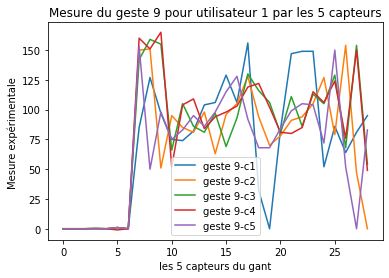

In [142]:
for i in range(5):
    plt.plot(X[t9_u1[i]], label="geste 9-c"+str(i+1))
    plt.legend()

plt.xlabel("les 5 capteurs du gant")
plt.ylabel("Mesure expérimentale ")
plt.title('Mesure du geste 9 pour utilisateur 1 par les 5 capteurs')
plt.show()

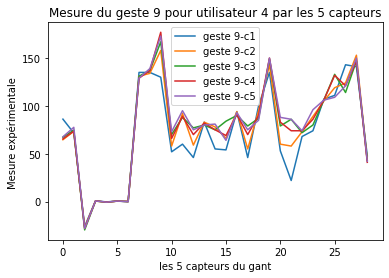

In [143]:
for i in range(5):
    plt.plot(X[t9_u4[i]], label="geste 9-c"+str(i+1))
    plt.legend()

plt.xlabel("les 5 capteurs du gant")
plt.ylabel("Mesure expérimentale ")
plt.title('Mesure du geste 9 pour utilisateur 4 par les 5 capteurs')
plt.show()

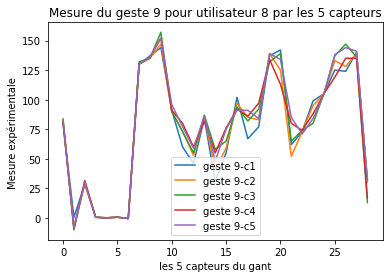

In [144]:
for i in range(5):
    plt.plot(X[t9_u8[i]], label="geste 9-c"+str(i+1))
    plt.legend()

plt.xlabel("les 5 capteurs du gant")
plt.ylabel("Mesure expérimentale ")
plt.title('Mesure du geste 9 pour utilisateur 8 par les 5 capteurs')
plt.show()

############## Geste 18 #############

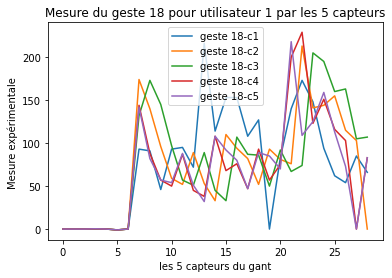

In [145]:
for i in range(5):
    plt.plot(X[t18_u1[i]], label="geste 18-c"+str(i+1))
    plt.legend()

plt.xlabel("les 5 capteurs du gant")
plt.ylabel("Mesure expérimentale ")
plt.title('Mesure du geste 18 pour utilisateur 1 par les 5 capteurs')
plt.show()

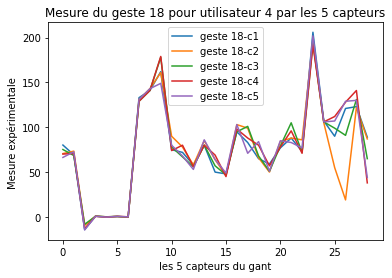

In [146]:
for i in range(5):
    plt.plot(X[t18_u4[i]], label="geste 18-c"+str(i+1))
    plt.legend()

plt.xlabel("les 5 capteurs du gant")
plt.ylabel("Mesure expérimentale ")
plt.title('Mesure du geste 18 pour utilisateur 4 par les 5 capteurs')
plt.show()

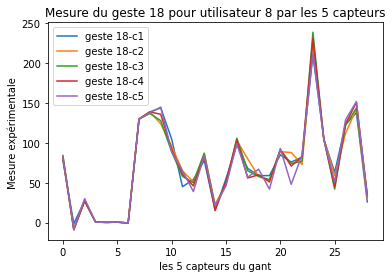

In [147]:
for i in range(5):
    plt.plot(X[t18_u8[i]], label="geste 18-c"+str(i+1))
    plt.legend()

plt.xlabel("les 5 capteurs du gant")
plt.ylabel("Mesure expérimentale ")
plt.title('Mesure du geste 18 pour utilisateur 8 par les 5 capteurs')
plt.show()

Sur les gestes observés, pour l'instant sans faire attention aux valeurs relevées par nos capteurs on observe pour les utilisateurs 4 et 8 une certaine tendance pour le même geste effectué (2, 9 ou 18) alors que pour l'utilisateur 1, même en faisant le même geste on observe beaucoup de variabilités sur les valeurs observées ce qui pourrait s'expliquer par un nombre de répétitions plus grands donc une plus grandes précisions dans la reconnaissances des différents gestes.



# Répartition du nb de répétitions du geste en fonction de la classe et par utilisateur

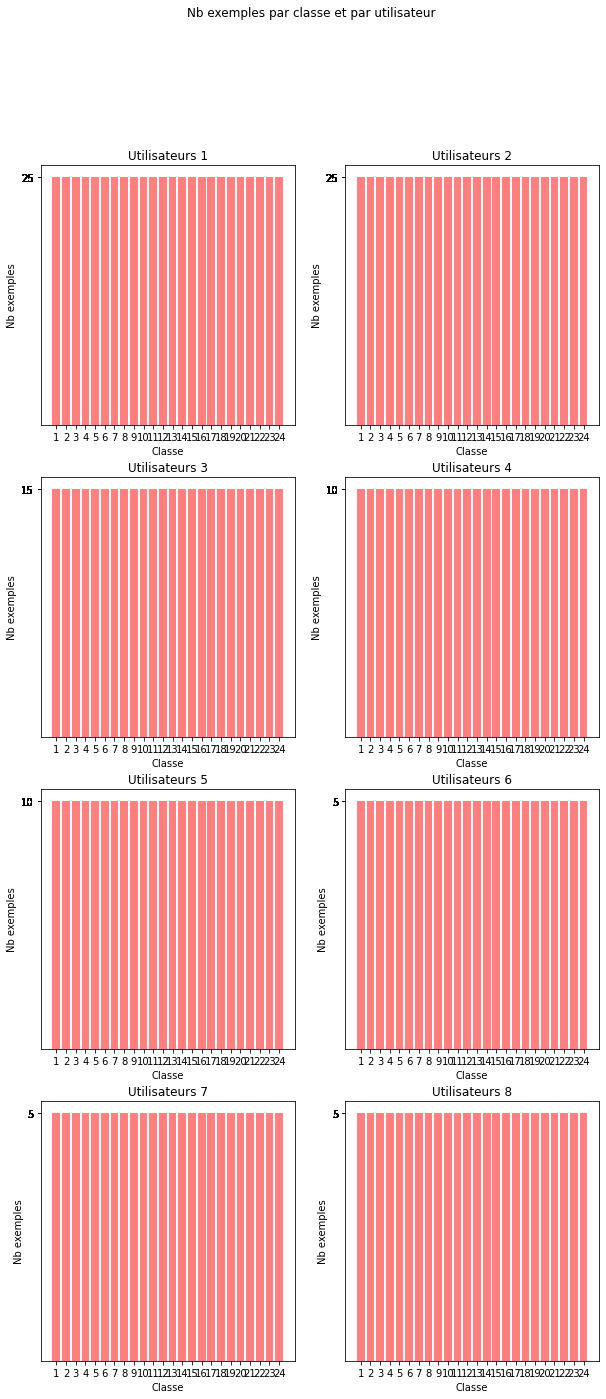

In [82]:
fig,ax=plt.subplots(4,2,figsize=(10,22))
u=1
for i in range(4):
    for j in range(2):
        targets,counts=np.unique(Y[np.where(U==u)[0]],return_counts=True)
        ax[i,j].bar(targets,counts,color=color_map(likeability_scores))
        ax[i,j].set_title("Utilisateurs "+str(u))
        ax[i,j].set_xticks(targets)
        ax[i,j].set_xlabel("Classe (geste)")
        ax[i,j].set_ylabel("Nb répétitions du geste")
        ax[i,j].set_yticks(counts)
        u+=1
fig.suptitle("Nb répétition de geste par classe et par utilisateur")
plt.show()

In [148]:
!pip install plotly
import plotly.express as px

In [201]:
matx=np.corrcoef(X.T)
px.imshow(np.where(matx>0.7,matx,0))

In [215]:
Y_1=np.array(f['Target']).T
px.imshow(np.corrcoef(np.hstack((X,Y_1)).T)[-1].reshape(1,30))

In [ ]:
df.describe()

#2eme partie : Protocol expérimental
Objectifs :

* "base line" => pas optimisé, variable intéressante
* score, modèle simple (knn, randomforest,svm) en respectant le protocole expérimental.
* feature engineering
* comparaison modèle
* optimisation hyperparamètre
* nouvelles contributions

In [236]:
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,f1_score

In [161]:
dummy = DummyClassifier(strategy="uniform", random_state=42, constant=24)
random_forest = RandomForestClassifier(random_state=42)
decision_tree = DecisionTreeClassifier()
knn = KNeighborsClassifier()
svm = SVC(decision_function_shape='ovo')
mlp = MLPClassifier()

In [162]:
n_split = 5
sss = StratifiedShuffleSplit(n_splits=n_split, test_size=0.3, random_state=42)

# Division du jeu de données (TRAIN + VALIDATION + TEST)


# Création des différents datasets à tester


2- Séparations par capteurs
* X en considérant tous les capteurs
* X en considérant tous les capteurs (scaled)
* X en considérant les 23 autres capteurs restants => 80% train


# Analyse des Features

In [237]:
X = df.to_numpy()
y = target_data

# Plusieurs dataset à tester
scaler = StandardScaler()
scaler.fit(X)
X_scale = scaler.transform(X)
X_23captors = X[:,7:]

29
[0.00519749 0.00450029 0.00917529 0.01437266 0.02421129 0.01472722
 0.0112785  0.04215671 0.03500903 0.05606731 0.05652645 0.04487026
 0.07876711 0.02493436 0.04079905 0.07231666 0.01853641 0.0760175
 0.03308573 0.07576902 0.01000016 0.0465054  0.0446397  0.08331608
 0.00456887 0.02387354 0.01490793 0.02414672 0.00972326]


Text(0, 0.5, 'Importance')

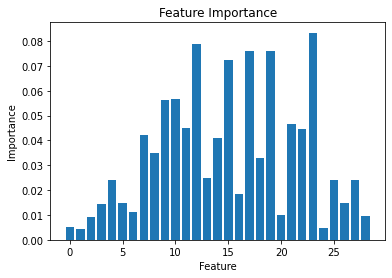

In [238]:
random_forest.fit(X,y)
print(random_forest.n_features_)
print(random_forest.feature_importances_)
plt.bar(np.arange(29),random_forest.feature_importances_)
plt.title("Feature Importance")
plt.xlabel("Feature")
plt.ylabel("Importance")

# Base Line

In [218]:
good_pred = 0
for row in range(X.shape[0]) :
  r = random.randint(1,24)
  if y[row] == r :
    good_pred += 1
print("Score accuracy", good_pred / X.shape[0])
print(np.unique(y))


acc_cv = cross_val_score(dummy, X, y, cv=sss)
print("Accuracy Score (KFold=5) =>",acc_cv,"=>",acc_cv.mean())

Score accuracy 0.03791666666666667
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]
Accuracy Score (KFold=5) => [0.04305556 0.05277778 0.04027778 0.03055556 0.04444444] => 0.042222222222222223


In [219]:
acc_cv = cross_val_score(dummy, X, y, cv=sss)
print("Accuracy Score (KFold=5) =>",acc_cv,"=>",acc_cv.mean())

Accuracy Score (KFold=5) => [0.04305556 0.05277778 0.04027778 0.03055556 0.04444444] => 0.042222222222222223


# Dummy Classifier

In [222]:
strategies = ["stratified","most_frequent","prior","uniform","constant"]
for strat in strategies:
  dummy_clf = DummyClassifier(strategy=strat, random_state=0, constant=2)
  dummy_clf.fit(X, y)
  print(dummy_clf.predict(X))
  print("Stratégie {}: {}".format(strat, dummy_clf.score(X, y)))
 

[ 9 12  7 ... 14  1 20]
Stratégie stratified: 0.04083333333333333
[1 1 1 ... 1 1 1]
Stratégie most_frequent: 0.041666666666666664
[1 1 1 ... 1 1 1]
Stratégie prior: 0.041666666666666664
[13 16 22 ...  5  5 14]
Stratégie uniform: 0.04541666666666667
[2 2 2 ... 2 2 2]
Stratégie constant: 0.041666666666666664


In [226]:
accuracy_dummy_cv = []
strategies = ["stratified","most_frequent","prior","uniform","constant"]

for strat in strategies :
  tmp = 0.0
  for train_index, test_index in sss.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    dummy_clf = DummyClassifier(strategy=strat, random_state=0, constant=1)
    dummy_clf.fit(X_train, y_train)

    tmp += dummy_clf.score(X_test, y_test)

  print(strat,":", tmp/n_split)

stratified : 0.04222222222222223
most_frequent : 0.041666666666666664
prior : 0.041666666666666664
uniform : 0.04083333333333333
constant : 0.041666666666666664


# Modèle KNN

In [239]:
acc_cv = cross_val_score(knn, X, y, cv=sss)
print("Accuracy Score (KFold=5) =>",acc_cv,"=> %.3f"%acc_cv.mean())

acc_cv = cross_val_score(knn, X_scale, y, cv=sss)
print("Accuracy Score (KFold=5) =>",acc_cv,"=> %.3f"%acc_cv.mean())

acc_cv = cross_val_score(knn, X_23captors, y, cv=sss)
print("Accuracy Score (KFold=5) =>",acc_cv,"=> %.3f"%acc_cv.mean())

Accuracy Score (KFold=5) => [0.91666667 0.91805556 0.92638889 0.9125     0.91111111] => 0.917
Accuracy Score (KFold=5) => [0.89722222 0.9        0.91388889 0.92083333 0.89305556] => 0.905
Accuracy Score (KFold=5) => [0.9125     0.92361111 0.93194444 0.925      0.92361111] => 0.923


Recherche des meilleurs hyper-parammètres + crossval : GridSearchCV

In [246]:
param_grid_knn = {
    'n_neighbors' : [2,10,20,30],
    'weights' : ['uniform','distance'],
    'metric' : ['euclidian', 'manhattan', 'minkowski']
}
CV_knn = GridSearchCV(estimator=knn, param_grid=param_grid_knn, verbose=1, n_jobs=-1, cv= sss)

In [247]:
CV_knn.fit(X, y)
print(CV_knn.best_params_)
acc_cv = cross_val_score(CV_knn.best_estimator_, X, y, cv=sss)
print("Accuracy Score (KFold=5) =>",acc_cv,"=> %.3f"%acc_cv.mean())

CV_knn.fit(X_scale, y)
print(CV_knn.best_params_)
acc_cv = cross_val_score(CV_knn.best_estimator_, X_scale, y, cv=sss)
print("Accuracy Score (KFold=5) =>",acc_cv,"=> %.3f"%acc_cv.mean())

CV_knn.fit(X_23captors, y)
print(CV_knn.best_params_)
acc_cv = cross_val_score(CV_knn.best_estimator_, X_23captors, y, cv=sss)
print("Accuracy Score (KFold=5) =>",acc_cv,"=> %.3f"%acc_cv.mean())

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    4.2s finished


{'metric': 'manhattan', 'n_neighbors': 2, 'weights': 'distance'}
Accuracy Score (KFold=5) => [0.92916667 0.9375     0.94861111 0.9375     0.94583333] => 0.940
Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    4.6s finished


{'metric': 'minkowski', 'n_neighbors': 2, 'weights': 'distance'}
Accuracy Score (KFold=5) => [0.94444444 0.94722222 0.95416667 0.95138889 0.95      ] => 0.949
Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


{'metric': 'minkowski', 'n_neighbors': 2, 'weights': 'distance'}
Accuracy Score (KFold=5) => [0.92083333 0.93194444 0.94166667 0.93333333 0.93472222] => 0.932


[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    3.4s finished


In [248]:
print(CV_knn.best_params_)
print(CV_knn.best_score_)

{'metric': 'minkowski', 'n_neighbors': 2, 'weights': 'distance'}
0.9324999999999999


Modèle Random Forest

In [249]:
acc_cv = cross_val_score(random_forest, X, y, cv=sss)
print("Accuracy Score (KFold=5) =>",acc_cv,"=> %.4f"%acc_cv.mean())

acc_cv = cross_val_score(random_forest, X_scale, y, cv=sss)
print("Accuracy Score (KFold=5) =>",acc_cv,"=> %.4f"%acc_cv.mean())

acc_cv = cross_val_score(random_forest, X_23captors, y, cv=sss)
print("Accuracy Score (KFold=5) =>",acc_cv,"=> %.4f"%acc_cv.mean())

Accuracy Score (KFold=5) => [0.94166667 0.95416667 0.96111111 0.95972222 0.96527778] => 0.9564
Accuracy Score (KFold=5) => [0.94027778 0.95416667 0.96111111 0.95972222 0.96527778] => 0.9561
Accuracy Score (KFold=5) => [0.93194444 0.94861111 0.95138889 0.94861111 0.95555556] => 0.9472


In [250]:
from sklearn.model_selection import RandomizedSearchCV

# Nombres de features à considérer à chaque split 
max_features = ['auto', 'sqrt', "log2"]
# NB arbre dans random forest 
n_estimators = [20, 70, 400, 1500, 2400]
# NB Maximum du nombres de niveau des arbres 
max_depth = [5, 8, 15, 25, 30, None]
# Minimum number of samples required to split a node
min_samples_split = [5, 10, 20, 50, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 4, 7, 15] 

random_grid = {'max_features': max_features,
               'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf
               }

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = random_forest, param_distributions = random_grid, n_iter = 100, cv = sss, verbose=1, random_state=42, n_jobs = -1)

In [251]:
rf_random.fit(X, y)
print(rf_random.best_params_)
acc_cv = cross_val_score(rf_random.best_estimator_, X, y, cv=sss)
print("Accuracy Score (KFold=5) =>",acc_cv,"=> %.3f"%acc_cv.mean())

rf_random.fit(X_scale, y)
print(rf_random.best_params_)
acc_cv = cross_val_score(rf_random.best_estimator_, X_scale, y, cv=sss)
print("Accuracy Score (KFold=5) =>",acc_cv,"=> %.3f"%acc_cv.mean())


rf_random.fit(X_23captors, y)
print(rf_random.best_params_)
acc_cv = cross_val_score(rf_random.best_estimator_, X_23captors, y, cv=sss)
print("Accuracy Score (KFold=5) =>",acc_cv,"=> %.3f"%acc_cv.mean())

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  9.1min
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning:

A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.

[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed: 20.3min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed: 22.4min finished


{'n_estimators': 70, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 25}
Accuracy Score (KFold=5) => [0.94583333 0.95972222 0.95833333 0.95972222 0.95833333] => 0.956
Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  9.2min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed: 20.2min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed: 22.3min finished


{'n_estimators': 2400, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 25}
Accuracy Score (KFold=5) => [0.94166667 0.96111111 0.95972222 0.95277778 0.96666667] => 0.956
Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  8.0min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed: 17.7min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed: 19.5min finished


{'n_estimators': 70, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 25}
Accuracy Score (KFold=5) => [0.93333333 0.94444444 0.95       0.94861111 0.95      ] => 0.945
